1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import poisson, chi2
from scipy import stats
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
hist_avg = 6.3

prob = 1 - poisson.cdf(15, hist_avg)
print("Probability of observing 15 or more hurricanes in a single year: \n", prob)

z_score = (15 - hist_avg) / (hist_avg ** 0.5)
print("\n Z Score: ", z_score)

pvalue = stats.norm.cdf(-z_score) + (1. - stats.norm.cdf(z_score))
print("\n p-value =", pvalue)

if z_score >= 3:
    print("\n The difference beween the number of hurricanes in 2005 is significantly different from the historic average.")
else:
    print("\n The difference beween the number of hurricanes in 2005 is not significantly different from the historic average.")


Probability of observing 15 or more hurricanes in a single year: 
 0.0008444930803583883

 Z Score:  3.4661629670697414

 p-value = 0.0005279431738299246

 The difference beween the number of hurricanes in 2005 is significantly different from the historic average.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)
alpha = 0.05

pre_mean = np.mean(pre)
pre_var = np.var(pre, ddof=1)
post_mean = np.mean(post)
post_var = np.var(post, ddof=1)

sigma=np.sqrt((pre_var + post_var)/2)
t_stat = (pre_mean - post_mean) / (sigma * np.sqrt(2/n))
print("T: ",t_stat)

pvalue = stats.t.cdf(t_stat,n-1) + (1. - stats.t.cdf(-t_stat,n-1))
print("p-value =", pvalue)

if pvalue < alpha:
    print("The change was stathistically significant.")
else:
    print("The change was not stathistically significant.")

T:  -3.786997938137629
p-value = 0.004302464132864604
The change was stathistically significant.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

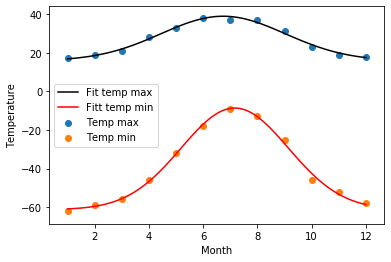

In [4]:
def func(x, m, v, A, off):
    return A * stats.norm.pdf(x, loc=m, scale=v) + off

temps_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temps_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
x = np.linspace(1,12,100)

opt_max, cov_max = optimize.curve_fit(func, months, temps_max, p0=[6, 1, 1, 0], full_output=False)

plt.plot(x, func(x, opt_max[0], opt_max[1], opt_max[2], opt_max[3]), color='black', label='Fit temp max')
plt.scatter(months, temps_max, label='Temp max')

opt_min, cov_min = optimize.curve_fit(func, months, temps_min, p0=[6, 1, 1, 0], full_output=False)

plt.plot(x, func(x, opt_min[0], opt_min[1], opt_min[2], opt_min[3]), color='red', label='Fitt temp min')
plt.scatter(months, temps_min, label='Temp min')
plt.ylabel('Temperature')
plt.xlabel('Month')
plt.legend()
plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


<Figure size 432x288 with 0 Axes>

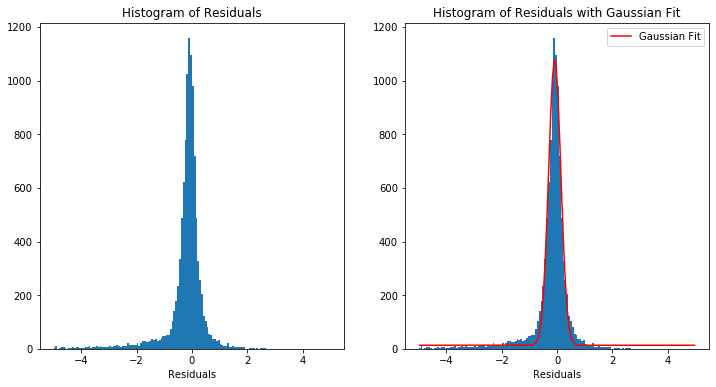

chi2 = 2360.53712512561
p-value:  0.0
The fit is considered unsatisfactor


In [7]:
data = pd.read_pickle("./data/residuals_261.pkl").item()
    
df = pd.DataFrame(data, columns = ['residuals','distances'])
display(df)

nbins = 150

plt.figure()
fig, axes = plt.subplots(1, 2 , figsize=(12, 6))
axes[0].hist(df['residuals'], bins = nbins, range = (-5,5))
axes[0].set_xlabel('Residuals')
axes[0].set_title('Histogram of Residuals')

bin_heights, bin_borders, _ = plt.hist(df["residuals"], bins = nbins, range = (-5,5))
bin_centers = (bin_borders[:-1] + bin_borders[1:])*0.5

poisson_uncertainty = np.sqrt(np.abs(bin_heights))

def gaussian(x, a, mu, sigma, o):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) + o

mu = np.mean(df["residuals"])
sigma = np.std(df["residuals"])

# Fit the gaussian function to the histogram
params, params_covariance = optimize.curve_fit(gaussian, bin_centers, bin_heights, [max(df["residuals"]), mu, sigma, 0])

# Plot the fitted gaussian function
axes[1].hist(df["residuals"], bins = nbins, range = (-5,5), color ="C0")
axes[1].plot(bin_centers, gaussian(bin_centers, *params), label = "Gaussian Fit", color ="red")
axes[1].set_xlabel('Residuals')
axes[1].set_title('Histogram of Residuals with Gaussian Fit')
axes[1].legend()
plt.show()

# Calculate the chi-squared statistic
chi_squared = np.sum((bin_heights - gaussian(bin_centers, *params))**2 / gaussian(bin_centers, *params))
print("chi2 =", chi_squared)

# Calculate the p-value
ndof = nbins - 1
p_value = 1 - chi2.cdf(chi_squared, ndof)
print("p-value: ", p_value)

if(p_value < 0.05):
    print("The fit is considered unsatisfactor")
else:
    print("The fit is considered satisfactor")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [10]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data_ex11/

--2023-01-19 17:25:50--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-19 17:25:51--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6397d6ccadc73378be916c9731.dl.dropboxusercontent.com/cd/0/inline/B01GxPRb0nF9aYHXWh_xRcEXlbWkj-u-zv1KGFqaIG0dLtVFp0qN49sKX9cgPRPL-djaVN2X7GjzJulY_xY_N8Plw5kB1hFZ1faJW0tmuYfVtDBo-WoJaOVQ0SdlMHe-l1zp6ymv5iJxkRos3iCF4Y0ZsBIIgDLFOpXT4Idu2xLI7Q/file# [following]
--2023-01-19 17:25:52--  https://uc6397d6ccadc73378be916c9731.dl.dropboxuserco

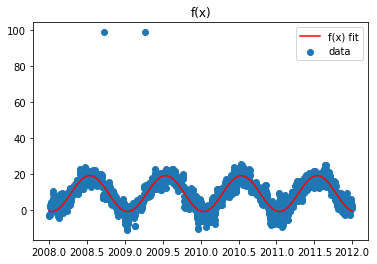

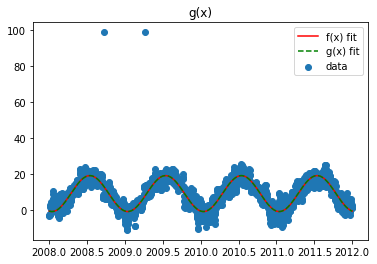

In [13]:
data = pd.read_csv('data_ex11/munich_temperatures_average_with_bad_data.txt', sep=' ', names = ['years', 'temp'] )
data = data[(data['years']>2008) & (data['years']<2012)]

def f_x(t, a, c, d):
    return a * np.cos(2 * np.pi * t + c) + d

def g_x(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d


time = data['years']
temperature = data['temp']

opt_f, cov_f = optimize.curve_fit(f_x, time, temperature, p0=[1, 1, 1])

plt.title('f(x)')
plt.scatter(time, temperature, label = 'data')
plt.plot(time,
         f_x(time, opt_f[0], opt_f[1], opt_f[2]),
         label='f(x) fit',
         color='red')

plt.legend()
plt.show()

opt_g, cov_g = optimize.curve_fit(g_x, time, temperature, p0=[1, 1, 1, 1])
plt.title('g(x)')
plt.scatter(time, temperature, label = 'data')
plt.plot(time, f_x(time, opt_f[0], opt_f[1], opt_f[2]), label = 'f(x) fit', color = 'red')
plt.plot(time, g_x(time, opt_g[0], opt_g[1], opt_g[2], opt_g[3]), label = 'g(x) fit', color = 'green', ls='--')
plt.legend()
plt.show()